In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Importando e Visualizando os Dados

In [2]:
casas = pd.read_csv("houses_to_rent.csv")

In [3]:
casas['total'] = casas['total'].apply(lambda x: float(x.replace(",",".")))
casas.head(5)

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
0,0,1,240,3,3,4,-,acept,furnished,0,"8,000","1,000",121,9.121
1,1,0,64,2,1,1,10,acept,not furnished,540,820,122,11,1.493
2,2,1,443,5,5,4,3,acept,furnished,"4,172","7,000","1,417",89,12.680
3,3,1,73,2,2,1,12,acept,not furnished,700,"1,250",150,16,2.116
4,4,1,19,1,1,0,-,not acept,not furnished,0,"1,200",41,16,1.257


## Normalizando as colunas dos dados

In [4]:
#Colunas selecionadas para o DF
categorias = ['area', 'rooms', 'bathroom', 'parking spaces']
matriz_x = np.array(casas[categorias], dtype= float)

#Normalizando a matriz
for x in range(0,4):
    matriz_x.T[x] = (matriz_x.T[x] - matriz_x.T[x].min()) / (matriz_x.T[x].max() - matriz_x.T[x].min())
#Normalizando vetor resultados
vetor_y = np.array(casas['total'])
vetor_y = (vetor_y - vetor_y.min()) / (vetor_y.max() - vetor_y.min())

### Criando os Thetas

In [37]:
#Obtendo o número de thetas - 1
tamanho = matriz_x.shape[1]
tamanho

#Criando thetas em valor padrão
thetas = np.ones(shape= tamanho + 1,dtype=float)


## Criando funções auxiliares

In [46]:
#Funçao de estimativa
def hipotese(x, theta):
    total = theta[-1]
    return total + x.dot(theta[0:-1]).sum()

In [47]:
#Função do custo total
def custo_total(x, theta, y):
    custo_total = 0
    for x_i,y_i in zip(x,y):
        custo_total += (hipotese(x_i, theta) - y_i)** 2
    return custo_total

# Função principal
##### -Nesse algoritmo implementei a ideia de alpha variável, utilizando uma outra variável chamada beta, a variável beta é o destino final da variável alpha, isso significa que ao final das iterações escolhidas, alpha será igual a beta, esse método resultou numa convergência muito mais rápida. Em média na iteração numero 1, o custo total pra esse dataset ficava por volta de 8.500, utilizando alpha variável com o mesmo número de iterações o custo total ficava em 700, além disso, na 50 iteração o método normal ficava em 300 enquanto a de alpha e beta 98, usando alpha 0.5 e beta 0.1, atualmente usamos alpha 0.7 por ajudar mais ainda, entretando, usar um alpha inicial de 1, piora.

In [82]:
#Função do gradiente utilizando alpha variável
def gradiente (iteracoes, alpha, beta, x, y, theta):
    
    #Calculando tamanhos de vetores
    m = x.shape[0]
    thetas_size = theta.shape[0]
    vetor_gradiente = np.zeros(shape = thetas_size, dtype= float)
    aux = 0

    #Listas para exportar o histórico de aprendizado do algoritmo
    lista_x = []
    lista_y = []

    #valor para decrementar de alpha por iteracao:
    beta = (alpha - beta) / iteracoes

    #Loop com numero de iteracoes
    for j in range(iteracoes):
        #Loop por theta
        for t in range(thetas_size):
            #Loop por numero de linhas do banco
            vetor_gradiente[t] = 0
            for i in range(m):
                #calculando a função de custo de todos as linhas
                aux = (hipotese(x[i], theta) - y[i]) * 2 / m
                if t <= 3:
                    #multiplicando pelo x(i)j quando disponível
                    aux *= x[i][t]
                vetor_gradiente[t] += aux
        #Atualizando os thetas simultaneamente
        theta = theta - (vetor_gradiente * alpha)
        alpha -= beta
        #Adicionando ao histórico a cada 10 iterações
        if j % 10 == 0:
           lista_x.append(j + 1)
           lista_y.append(custo_total(x,theta,y))
    #Retornando os valores
    return theta,lista_x,lista_y

### Usando a função e pegando as informações

In [9]:
thetas, eixo_x, eixo_y = gradiente(iteracoes = 500, alpha = 0.7, beta = 0.1,x = matriz_x, y = vetor_y, theta = thetas)

### Criando DataFrames para gerar os gráficos

In [10]:
#Dicionários para gerar os dataframes
dicionario = {"Iteração" : eixo_x, "Custo Total" : eixo_y}
dicionario2 = {"Iteração" : eixo_x[4:], "Custo Total" : eixo_y[4:]}
dicionario3 = {"Linha" : [x for x in range(0, matriz_x.shape[0])], "Estimativa" : [hipotese(matriz_x[x], thetas) for x in range(0, matriz_x.shape[0])]}
dicionario3_Inicial = {"Linha" : [x for x in range(0, matriz_x.shape[0])], "Estimativa" : [hipotese(matriz_x[x], np.ones(shape= thetas.shape[0], dtype=float)) for x in range(0, matriz_x.shape[0])]}
dicionario4 = {"Linha" : [x for x in range(0, matriz_x.shape[0])], "Real" : [vetor_y[x] for x in range(0, matriz_x.shape[0])]}

#DataFrame com dicionário
dados_grafico =pd.DataFrame(dicionario)
dados_grafico2 = pd.DataFrame(dicionario2)
dados_grafico3 = pd.DataFrame(dicionario3)
dados_grafico3_inicial = pd.DataFrame(dicionario3_Inicial)
dados_grafico4 = pd.DataFrame(dicionario4)

# Primeiro Gráfico:
##### - Esses em questão, mostram a curva de custo total do algoritmo no decorrer das iterações. A coluna da esquerda é o gráfico com todos as funções de custo enquanto a coluna da direita foi removido as 5 primeiras funções de custo. A linha de cima apresenta os gráficos em escala normal e a linha inferior em escala logarítimica.

[None]

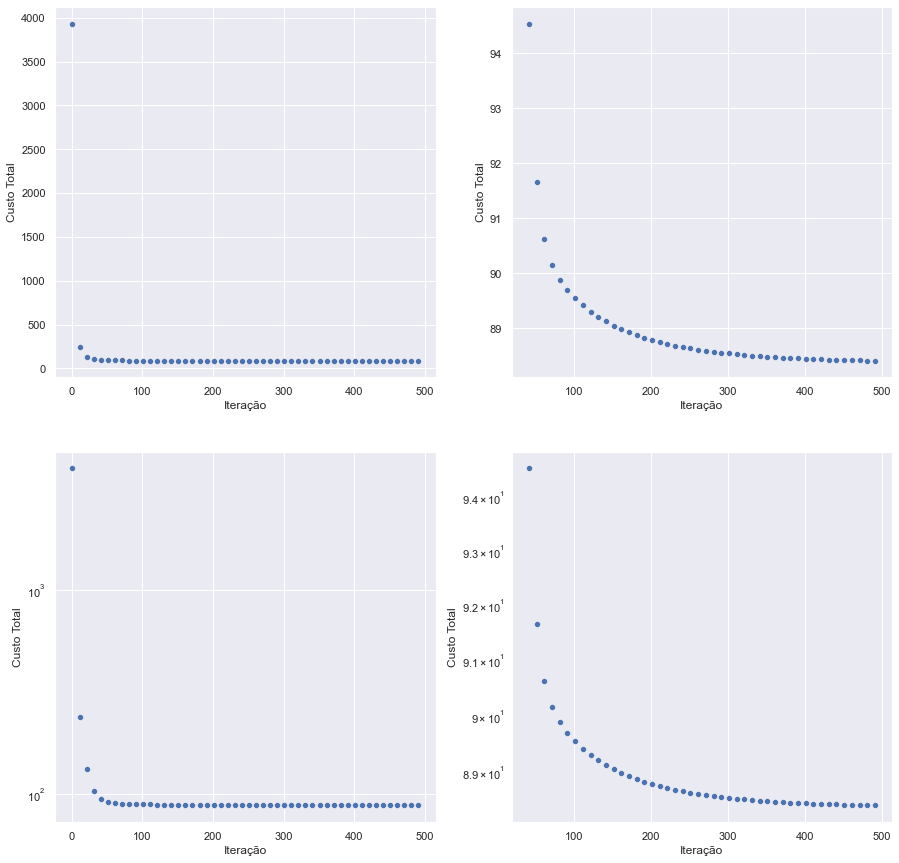

In [11]:
sns.set()
fig, axes = plt.subplots(2,2, figsize=(15,15))
sns.scatterplot(data = dados_grafico, x="Iteração", y="Custo Total", ax=axes[0,0])
sns.scatterplot(data = dados_grafico2, x="Iteração", y="Custo Total", ax=axes[0,1])
sns.scatterplot(data = dados_grafico, x="Iteração", y="Custo Total", ax=axes[1,0]).set(yscale='log')
sns.scatterplot(data = dados_grafico2, x="Iteração", y="Custo Total", ax=axes[1,1]).set(yscale='log')

# Segundo Gráfico
##### -Esse segundo gráfico mostra os chutes gerados pelo algoritmo na coluna esquerda e os reais resultados na coluna direita, sendo na primeira linha com nenhuma iteração, apenas chutes e na segunda linha após a curva de custo convergir (500 iterações).

[None]

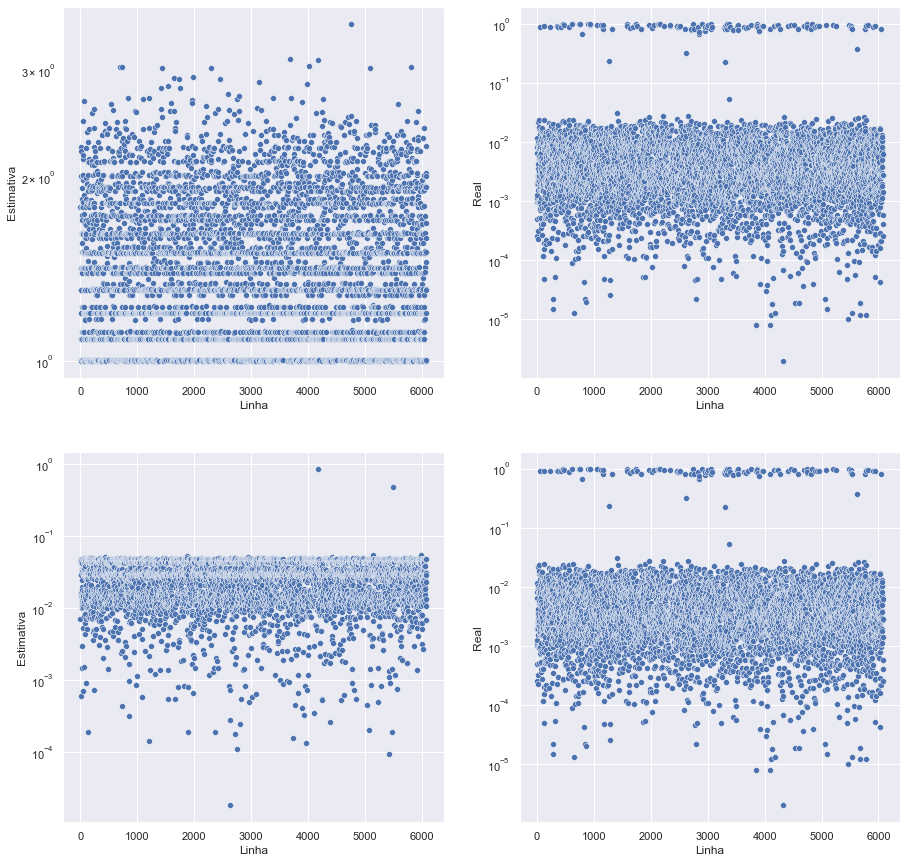

In [58]:
sns.set()
fig, axes = plt.subplots(2,2, figsize=(15,15))
sns.scatterplot(data = dados_grafico3, x="Linha", y="Estimativa", ax=axes[1,0]).set(yscale="log")
sns.scatterplot(data = dados_grafico3_inicial, x="Linha", y="Estimativa", ax=axes[0,0]).set(yscale="log")
sns.scatterplot(data = dados_grafico4, x="Linha", y="Real", ax=axes[0,1]).set(yscale="log")
sns.scatterplot(data = dados_grafico4, x="Linha", y="Real", ax=axes[1,1]).set(yscale="log")

# Usando o algoritmo em outra base

In [128]:
vinhos = pd.read_csv("winequality-red.csv", sep=";")
vinhos.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [129]:
#Colunas selecionadas para o DF
categorias_matriz = ["fixed_acidity","volatile_acidity","citric_acid","residual_sugar","chlorides","free_sulfur_dioxide","total_sulfur_dioxide","density","pH","sulphates","alcohol"]
matriz_x_v = np.array(vinhos[categorias_matriz], dtype=float)

#Normalizando a matriz
for x in range(0, len(categorias_matriz)):
    matriz_x_v.T[x] = (matriz_x_v.T[x] - matriz_x_v.T[x].min()) / (matriz_x_v.T[x].max() - matriz_x_v.T[x].min())

#Normalizando vetor resultados
vetor_y_v = np.array(vinhos['quality'], dtype=float)
vetor_y_v = (vetor_y_v - vetor_y_v.min()) / (vetor_y_v.max() - vetor_y_v.min())

In [130]:
#Obtendo o número de thetas - 1
tamanho = matriz_x_v.shape[1]
#Criando thetas em valor padrão
thetas = np.ones(shape= tamanho + 1,dtype=float)

In [131]:
thetas, eixo_x_v, eixo_y_v = gradiente(iteracoes = 500, alpha = 0.2, beta = 0.1,x = matriz_x_v, y = vetor_y_v, theta = thetas)

In [132]:
#Dicionários para gerar os dataframes
dicionario_v = {"Iteração" : eixo_x_v, "Custo Total" : eixo_y_v}
dicionario2_v = {"Iteração" : eixo_x_v[5:], "Custo Total" : eixo_y_v[5:]}

dicionario3_v = {"Linha" : [x for x in range(matriz_x_v.shape[0])], "Estimativa" : [hipotese(matriz_x_v[x], np.ones(shape= thetas.shape[0], dtype=float)) for x in range(matriz_x_v.shape[0])]}
dicionario4_v = {"Linha" : [x for x in range(matriz_x_v.shape[0])], "Real" : [vetor_y_v[x] for x in range(matriz_x_v.shape[0])]}
dicionario5_v = {"Linha" : [x for x in range(matriz_x_v.shape[0])], "Estimativa" : [hipotese(matriz_x_v[x], thetas) for x in range(matriz_x_v.shape[0])]}

#DataFrame com dicionário
dados_graficov = pd.DataFrame(dicionario_v)
dados_grafico2v = pd.DataFrame(dicionario2_v)

dados_grafico3_v = pd.DataFrame(dicionario3_v)
dados_grafico4_v = pd.DataFrame(dicionario4_v)
dados_grafico5_v = pd.DataFrame(dicionario5_v)

[None]

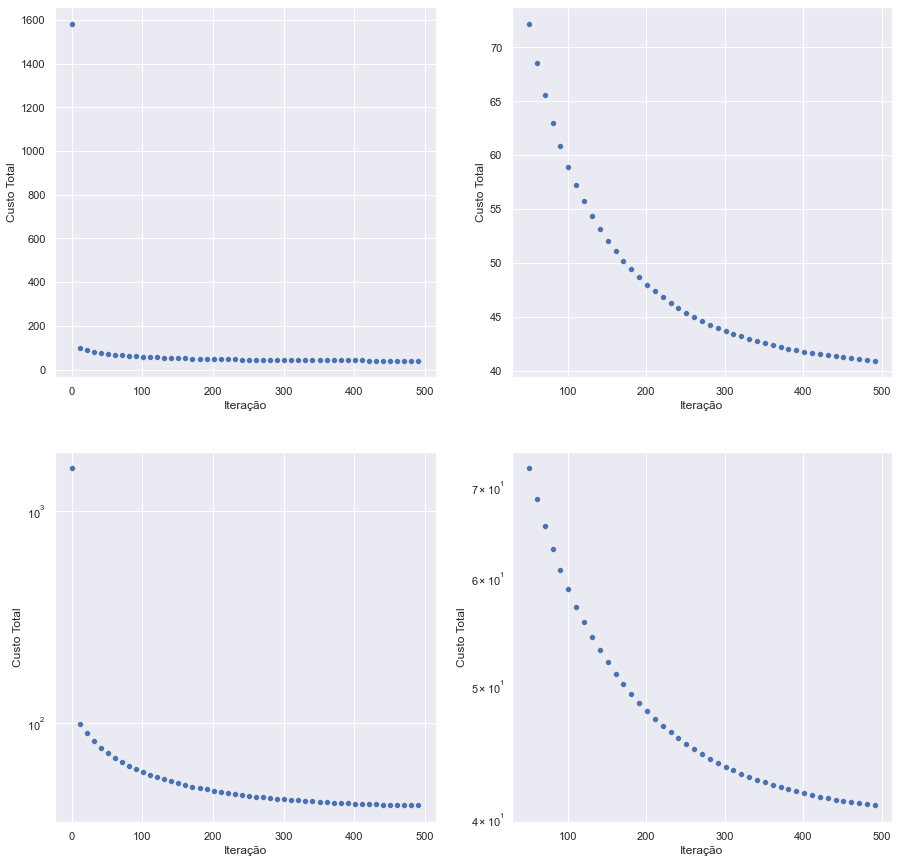

In [133]:
sns.set()
fig, axes = plt.subplots(2,2, figsize=(15,15))
sns.scatterplot(data=dados_graficov, x="Iteração", y="Custo Total", ax=axes[0,0])
sns.scatterplot(data=dados_grafico2v, x="Iteração", y="Custo Total", ax=axes[0,1])
sns.scatterplot(data=dados_graficov, x="Iteração", y="Custo Total", ax=axes[1,0]).set(yscale="log")
sns.scatterplot(data=dados_grafico2v, x="Iteração", y="Custo Total", ax=axes[1,1]).set(yscale="log")

<AxesSubplot:xlabel='Linha', ylabel='Real'>

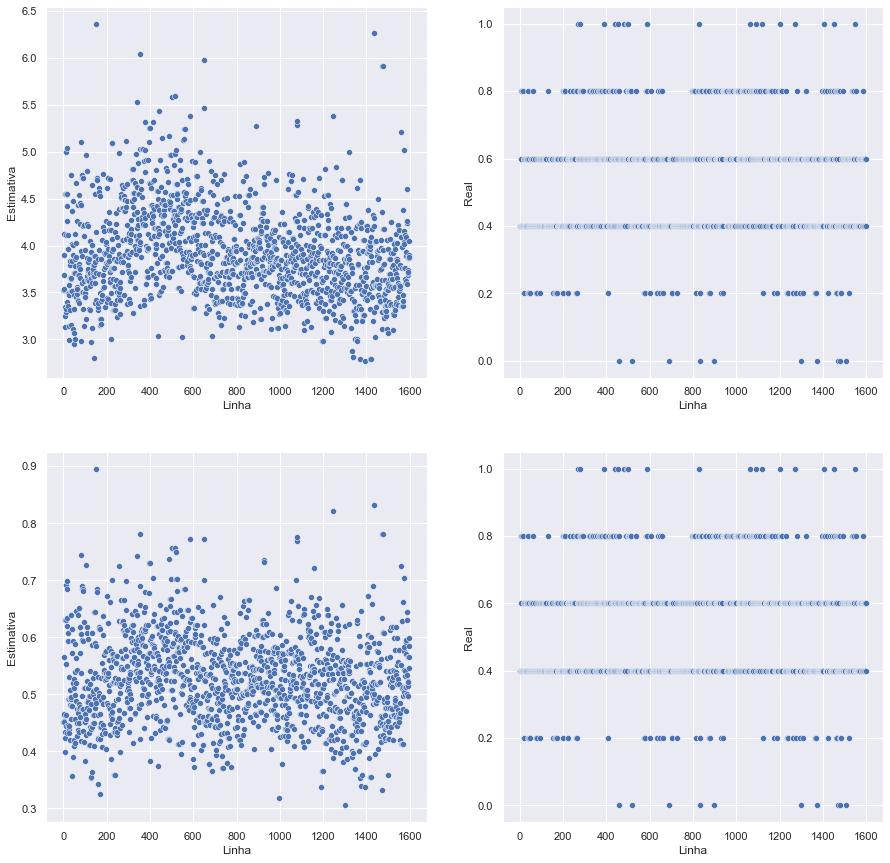

In [136]:
sns.set()
fig, axes = plt.subplots(2,2, figsize=(15,15))
sns.scatterplot(data=dados_grafico3_v, x="Linha", y="Estimativa", ax=axes[0,0])
sns.scatterplot(data=dados_grafico4_v, x="Linha", y="Real", ax=axes[0,1])
sns.scatterplot(data=dados_grafico5_v, x="Linha", y="Estimativa", ax=axes[1,0])
sns.scatterplot(data=dados_grafico4_v, x="Linha", y="Real", ax=axes[1,1])